# Parameter series for M/M/c model

This notebook shows the effect of different average service times in a M/M/c model on the waiting times.

## Importing modules

In [1]:
# Data collection
import pandas as pd

# Plotting modules
import matplotlib.pyplot as plt
import matplotlib.ticker as formater
import seaborn as sns

# Simulation
from queuesim import SimProcess, run_parallel, get_multi_run_info
from queuesim.models import mmc_model

# Analytic calculation
from queuesim.analytic import erlang_c_table

# Defining general plot style
sns.set()

## Model parameters

In [2]:
# Mean inter-arrival time
mean_i = 100

# Mean service time range
mean_s_range = range(70, 93)

# Number of operators
c = 1

# Number of arrivals to be simulated
count = 100_000

## Parallel simulation of the M/M/c models with E[I]=100, c=1 and E[S]=70,71,...,92 each with 100,000 arrivals

In [3]:
models, simulators = run_parallel([SimProcess(mmc_model(mean_i, mean_s, c, count)) for mean_s in mean_s_range])

23 parallel processes started.
All processes terminated, runtime: 9.4 seconds.
Results have been collected.


## Processing results

In [4]:
mu = [1 / model['meanS'] for model in models]
rho = [model['meanS'] / model['meanI'] / model['c'] for model in models]
ENQ = [model['Process'].statistic_queue_length.mean for model in models]
EN = [model['Process'].statistic_wip.mean for model in models]
EW = [model['Dispose'].statistic_client_waiting.mean for model in models]
EV = [model['Dispose'].statistic_client_residence.mean for model in models]

results = pd.DataFrame({'mu': mu, 'rho': rho, 'E[N_Q]': ENQ, 'E[N]': EN, 'E[W]': EW, 'E[V]': EV})

results

,mu,rho,E[N_Q],E[N],E[W],E[V]
0,0.014286,0.70,1.605788,2.303983,160.792174,230.704401
1,0.014085,0.71,1.725971,2.436737,172.316504,243.277503
2,0.013889,0.72,1.869298,2.589547,186.402693,258.224508
3,0.013699,0.73,1.924806,2.650831,192.633378,265.293408
4,0.013514,0.74,2.142714,2.884213,214.218194,288.349656
5,0.013333,0.75,2.241295,2.992828,221.844854,296.232086
6,0.013158,0.76,2.444390,3.207291,244.665790,321.026648
7,0.012987,0.77,2.454954,3.222717,245.074712,321.719456
8,0.012821,0.78,2.624778,3.398107,263.468063,341.092747
9,0.012658,0.79,2.954178,3.740084,295.276545,373.829494


## Calculating Erlang C formula results

In [5]:
parameter = [(1 / mean_i, mu, c) for mu in results["mu"]]
erlang_c_results = erlang_c_table(parameter)

## Plotting results

In [6]:
# Optional: Interactive diagram mode
# Run "pip install ipympl" first
# %matplotlib ipympl

Text(0.5, 1.0, 'Mean waiting time as a function of the utilization')

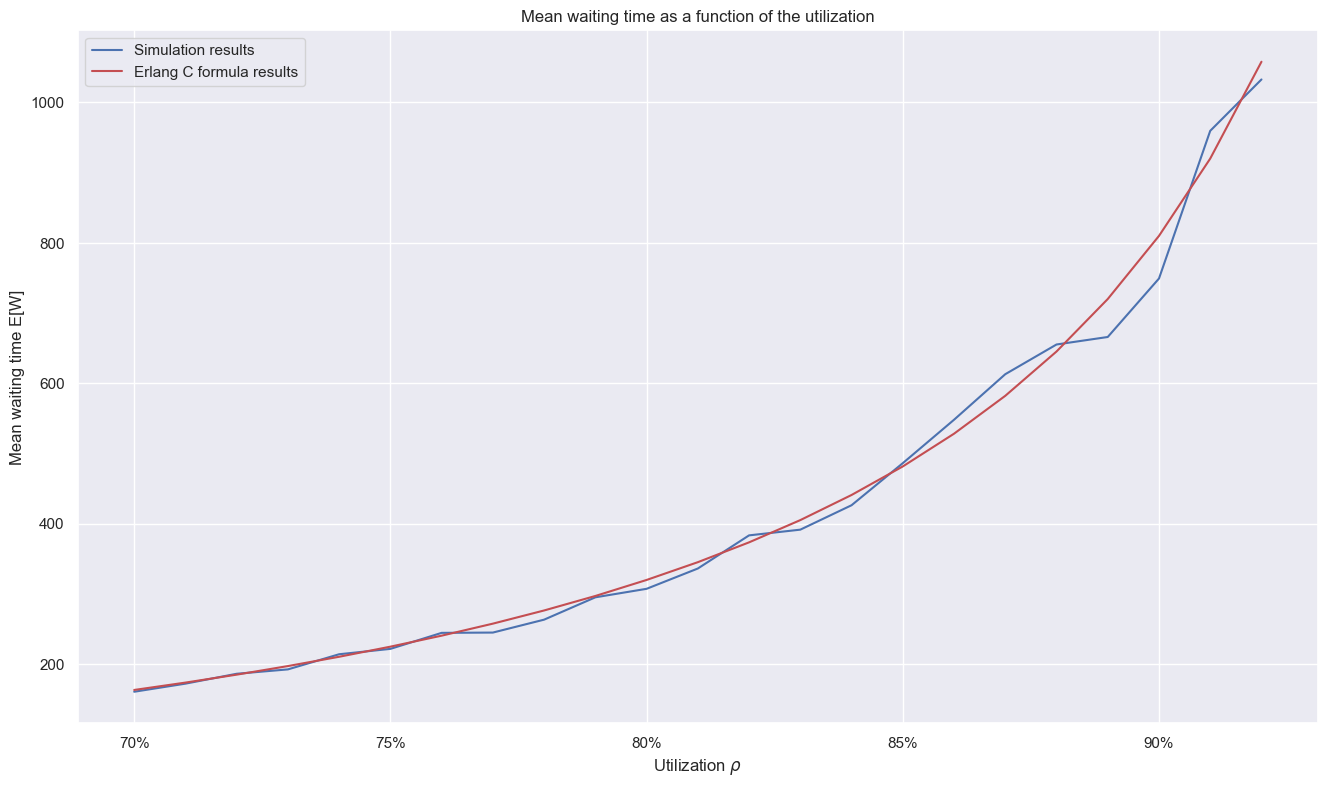

In [7]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(results['rho'], results['E[W]'], 'b', label="Simulation results")
ax.plot(erlang_c_results['rho'], erlang_c_results['E[W]'], 'r', label="Erlang C formula results")

ax.xaxis.set_major_formatter(formater.PercentFormatter(xmax=1, decimals=0))
ax.set_xlabel("Utilization $\\rho$")
ax.set_ylabel("Mean waiting time E[W]")
ax.legend()

ax.set_title("Mean waiting time as a function of the utilization")

## Simulation runtimes

In [8]:
print(get_multi_run_info([model['Source'] for model in models], simulators))

Models: 23
Client arrivals (total): 2.3 millions
Computing time (total): 2.3 seconds
Computing time per client (real): 23.0 µs


### Runtime

* total = Maximum of the computing times of the individual processes
* real = Computing time per client on a single CPU core (dividing this value by the number of CPU cores is total output)